In [ ]:
from sklearn.datasets import fetch_20newsgroups
news = fetch_20newsgroups(subset='all')

print("Number of articles: " + str(len(news.data)))
print("Number of diffrent categories: " + str(len(news.target_names)))

news.target_names

Number of articles: 18846
Number of diffrent categories: 20


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

As you can see, there are 18 846 newsgroup documents, distributed almost evenly across 20 different newsgroups. Our goal is to create a classifier that will classify each document based on its content. Let’s see the content of one document:

In [ ]:
print("\n".join(news.data[1121].split("\n")[:]))

From: et@teal.csn.org (Eric H. Taylor)
Subject: Re: Gravity waves, was: Predicting gravity wave quantization & Cosmic Noise
Summary: Dong ....  Dong ....  Do I hear the death-knell of relativity?
Keywords: space, curvature, nothing, tesla
Nntp-Posting-Host: teal.csn.org
Organization: 4-L Laboratories
Distribution: World
Expires: Wed, 28 Apr 1993 06:00:00 GMT
Lines: 30

In article <C4KvJF.4qo@well.sf.ca.us> metares@well.sf.ca.us (Tom Van Flandern) writes:
>crb7q@kelvin.seas.Virginia.EDU (Cameron Randale Bass) writes:
>> Bruce.Scott@launchpad.unc.edu (Bruce Scott) writes:
>>> "Existence" is undefined unless it is synonymous with "observable" in
>>> physics.
>> [crb] Dong ....  Dong ....  Dong ....  Do I hear the death-knell of
>> string theory?
>
>     I agree.  You can add "dark matter" and quarks and a lot of other
>unobservable, purely theoretical constructs in physics to that list,
>including the omni-present "black holes."
>
>     Will Bruce argue that their existence can be inferre

# Each document is a text written in English in a form of an email with a lot of punctuations. You should always do some pre-processing but here we’ll just concentrate on the model.

Define training function...create a function for training and in each attempt save results and accuracies.

In [ ]:
from sklearn.model_selection import train_test_split
import time

def train(classifier, X, y):
    start = time.time()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

    classifier.fit(X_train, y_train)
    end = time.time()

    print("Accuracy: " + str(classifier.score(X_test, y_test)) + ", Time duration: " + str(end - start))
    return classifier

Feature extraction

# Using “Bag of words” build a text classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

trial1 = Pipeline([ ('vectorizer', TfidfVectorizer()), ('classifier', MultinomialNB())])

train(trial1, news.data, news.target)

Accuracy: 0.8538461538461538, Time duration: 10.586126565933228


Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=Tr...      vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

# Parameter scaling: 
To improve accuracy remove stop words

In [ ]:
from nltk.corpus import stopwords

trial2 = Pipeline([ ('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english'))),('classifier', MultinomialNB())])

train(trial2, news.data, news.target)

Accuracy: 0.8806366047745358, Time duration: 10.30477237701416


Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=Tr...      vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

Accuracy is better and even the training is faster, more improvement, lets change the value of alpha in the classifier and check the best

In [ ]:
for alpha in [5, 0.5, 0.05, 0.005, 0.0005]:
    trial3 = Pipeline([('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english'))),('classifier', MultinomialNB(alpha=alpha))])
    train(trial3, news.data, news.target)

Accuracy: 0.8448275862068966, Time duration: 9.678558826446533
Accuracy: 0.8909814323607427, Time duration: 9.244025468826294
Accuracy: 0.9122015915119364, Time duration: 9.640069723129272
Accuracy: 0.9175066312997348, Time duration: 9.119089365005493
Accuracy: 0.9169761273209549, Time duration: 9.513797283172607


 #best accuracy of 91.758% is achieved for alpha 0.005
 for more improvement ignore the words that appear fewer than 5 times in all documents and use min_dif parameter:

In [ ]:
trial4 = Pipeline([ ('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english'), min_df=5)), ('classifier', MultinomialNB(alpha=0.005)) ])

train(trial4, news.data, news.target)

Accuracy: 0.910079575596817, Time duration: 9.253214359283447


Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=5,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=Tr...    vocabulary=None)), ('classifier', MultinomialNB(alpha=0.005, class_prior=None, fit_prior=True))])

In [ ]:
#Resulting accuracy is a bit lower, so this was a bad idea.

# use nltk 

try and stem the data with nltk (word root) with use of parameter tokenizer within TfidfVectorizer, it usually helps, and we can add punctuations to a list of stop words:

In [ ]:
import string
from nltk.stem import PorterStemmer
from nltk import word_tokenize

def stemming_tokenizer(text):
    stemmer = PorterStemmer()
    return [stemmer.stem(w) for w in word_tokenize(text)]

trial5 = Pipeline([ ('vectorizer', TfidfVectorizer(tokenizer=stemming_tokenizer, stop_words=stopwords.words('english') + list(string.punctuation))), ('classifier', MultinomialNB(alpha=0.005))])

train(trial5, news.data, news.target)

Accuracy: 0.9228116710875331, Time duration: 313.3142011165619


Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=Tr...ue, vocabulary=None)), ('classifier', MultinomialNB(alpha=0.005, class_prior=None, fit_prior=True))])

In [ ]:
Accuracy is a bit better, but the training last 34 times longer, stemming takes longer
Sometimes accuracy can cost you computation speed and you should find a nice balance between them

In [ ]:
#different classifiers...Linear SVC ...slower but may get better accuracy

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC

for classifier in [SGDClassifier(), LinearSVC()]:
    trial6 = Pipeline([('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english') + list(string.punctuation))), ('classifier', classifier)])

    train(trial6, news.data, news.target)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Accuracy: 0.926525198938992, Time duration: 12.49515414237976
Accuracy: 0.9320954907161804, Time duration: 15.64207410812378


In [ ]:
An accuracy of 93.2% for linear SVC is awesome
Here, an accuracy of 93% is good because we have 20 categories and some of them are quite similar,

# Model evaluation

 confusion_matrix() from sckit-learn to compare real and predicted categories:

Accuracy: 0.9352785145888595, Time duration: 31.470360279083252


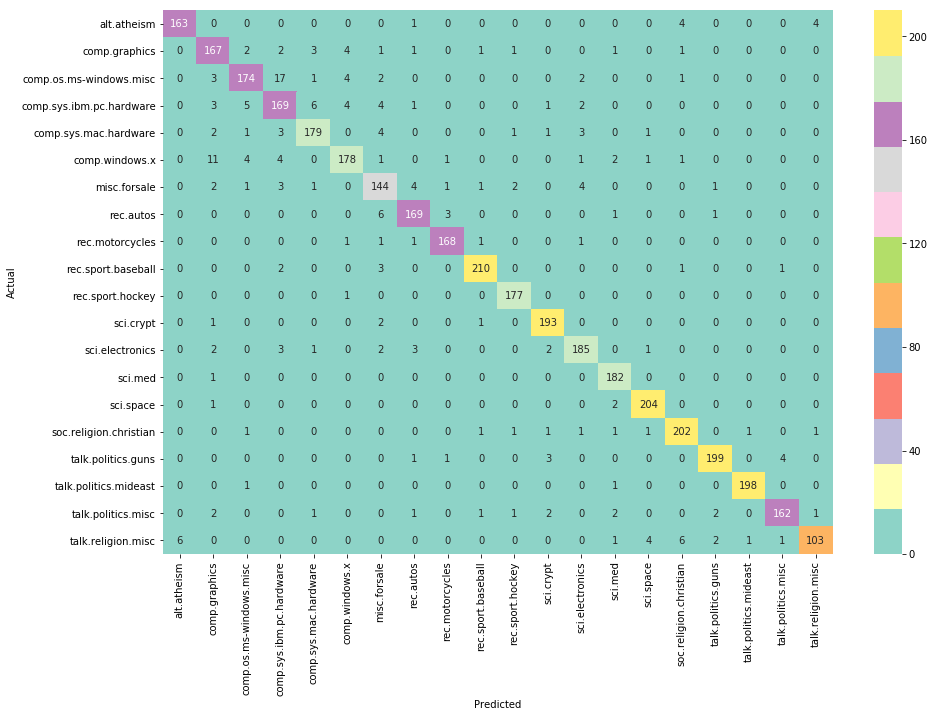

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

start = time.time()
classifier = Pipeline([('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english') + list(string.punctuation))),('classifier', LinearSVC(C=10))])
X_train, X_test, y_train, y_test = train_test_split(news.data, news.target, test_size=0.2, random_state=11)
classifier.fit(X_train, y_train)
end = time.time()

print("Accuracy: " + str(classifier.score(X_test, y_test)) + ", Time duration: " + str(end - start))

y_pred = classifier.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
labels=news.target_names
# Plot confusion_matrix
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(conf_mat, annot=True, cmap = "Set3", fmt ="d",
xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

The confusion matrix is a great way to see which categories model is mixing. For example, there are 17 articles from category comp.os.ms-windows.mics that are wrongly classified as comp.sys.ibm.pc.hardware. 

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=labels))

                          precision    recall  f1-score   support

             alt.atheism       0.96      0.95      0.96       172
           comp.graphics       0.86      0.91      0.88       184
 comp.os.ms-windows.misc       0.92      0.85      0.89       204
comp.sys.ibm.pc.hardware       0.83      0.87      0.85       195
   comp.sys.mac.hardware       0.93      0.92      0.93       195
          comp.windows.x       0.93      0.87      0.90       204
            misc.forsale       0.85      0.88      0.86       164
               rec.autos       0.93      0.94      0.93       180
         rec.motorcycles       0.97      0.97      0.97       173
      rec.sport.baseball       0.97      0.97      0.97       217
        rec.sport.hockey       0.97      0.99      0.98       178
               sci.crypt       0.95      0.98      0.96       197
         sci.electronics       0.93      0.93      0.93       199
                 sci.med       0.94      0.99      0.97       183
         

Category misc.forsale has the lowest accuracy, but the overall accuracy is great.

In [ ]:
#import numpy as np
#def show_top10(classifier, vectorizer, categories):
#    feature_names = np.asarray(vectorizer.get_feature_names())
#    for i, category in enumerate(categories):
#            top10 = np.argsort(classifier.coef_[i])[-10:]
#            print("%s: %s" % (category, " ".join(feature_names[top10])))
#
#show_top10(clf, vectorizer, newsgroups_train.target_names)